# Exploratory Data Analysis with Seaborn & Feature Selection and Classification

# Coursera

# Tumor Diagnosis 
# Exploratory Data Analysis

### About the Dataset:

The Breast Cancer Diagnostic data is available on the UCI Machine Learning Repository. This database is also available through the UW CS ftp server.

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. n the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].


### Attribute Information:

    ID number
    Diagnosis (M = malignant, B = benign) 3-32)

### Ten real-valued features are computed for each cell nucleus:

- radius (mean of distances from center to points on the perimeter)
- texture (standard deviation of gray-scale values)
- perimeter
- area
- smoothness (local variation in radius lengths)
- compactness (perimeter^2 / area - 1.0)
- concavity (severity of concave portions of the contour)
- concave points (number of concave portions of the contour)
- symmetry
- fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

# 1. Introduction and Importing the Data

In [52]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np # linear algebra 
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv) 
import seaborn as sns # data visualization library
import matplotlib.pyplot as plt 
%matplotlib inline
import time

In [20]:
data = pd.read_csv('https://raw.githubusercontent.com/pkmklong/Breast-Cancer-Wisconsin-Diagnostic-DataSet/master/data.csv')

In [21]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


<h2 align=center> Exploratory Data Analysis </h2>

# 2. Separate Target from Features

In [22]:
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [23]:
y=data['diagnosis']
drop_cols=['Unnamed: 32','id','diagnosis']
X=data.drop(drop_cols,axis=1)
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# 3. Diagnosis Distribution Visualization

Number of beningn tumors 357
Number of malignant tumors 212


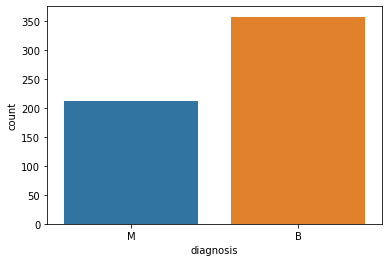

In [8]:
ax = sns.countplot(y,label='count')
B, M = y.value_counts()
print('Number of beningn tumors', B)
print('Number of malignant tumors', M)

In [9]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
fractal_dimension_mean,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


# Data Visualization

# 4 Visualizing Standardized Data with Seaborn

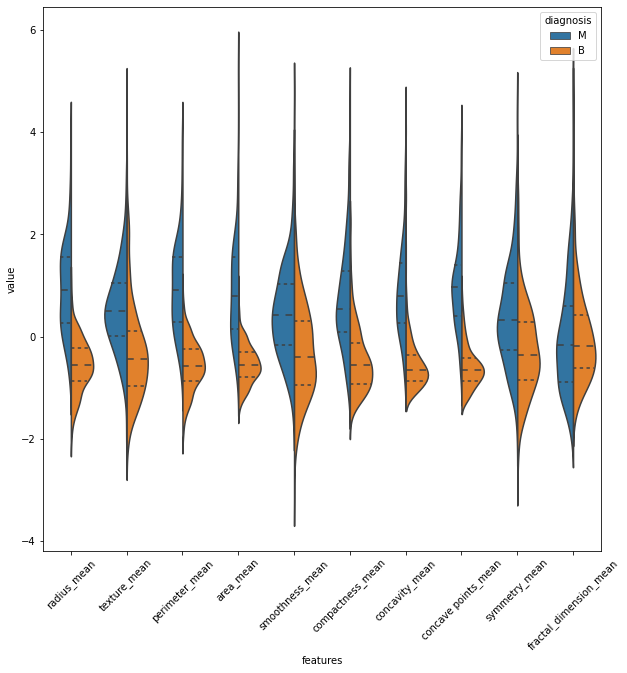

In [10]:
data = X
data_std = (data - data.mean())/data.std()
data = pd.concat([y,data_std.iloc[:,0:10]],axis=1)
data = pd.melt(data,id_vars='diagnosis',var_name='features',value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x='features',y='value',hue='diagnosis',data=data,split=True,inner='quart')
plt.xticks(rotation=45);

# 5. Violin Plots and Box Plots

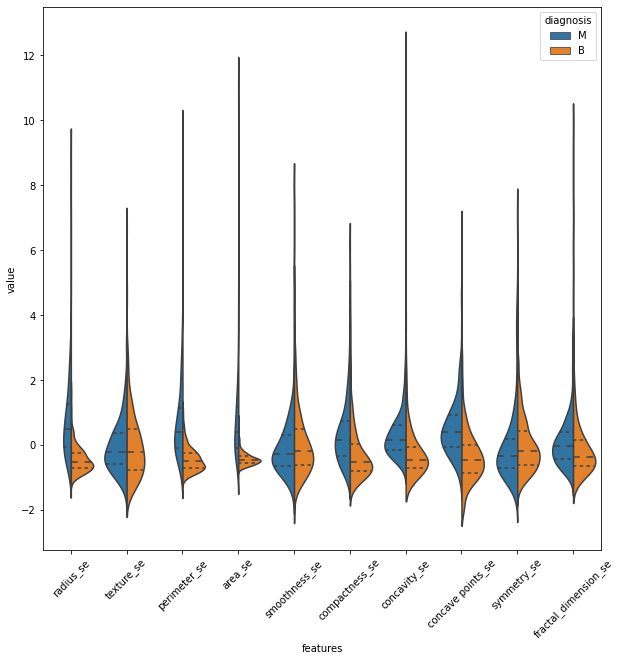

In [11]:
data = pd.concat([y,data_std.iloc[:,10:20]],axis=1)
data = pd.melt(data,id_vars='diagnosis',var_name='features',value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x='features',y='value',hue='diagnosis',data=data,split=True,inner='quart')
plt.xticks(rotation=45);

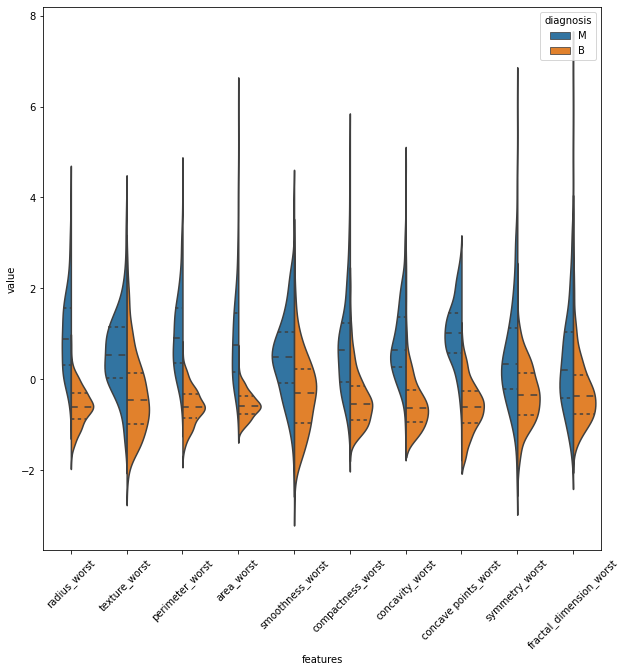

In [12]:
data = pd.concat([y,data_std.iloc[:,20:30]],axis=1)
data = pd.melt(data,id_vars='diagnosis',var_name='features',value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x='features',y='value',hue='diagnosis',data=data,split=True,inner='quart')
plt.xticks(rotation=45);

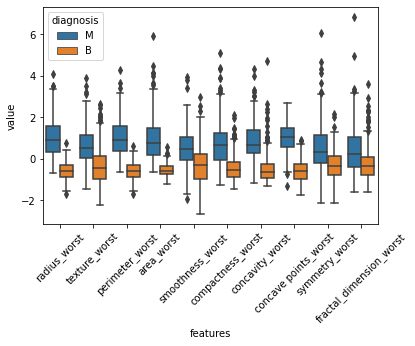

In [13]:
sns.boxplot(x='features',y='value',hue='diagnosis',data=data)
plt.xticks(rotation=45);

#  6. Using Joint Plots for Feature Comparison

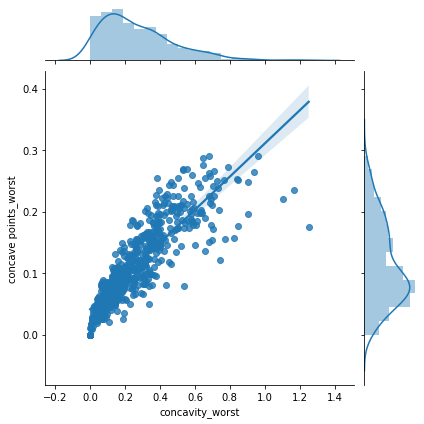

In [14]:
sns.jointplot(X.loc[:,'concavity_worst'],X.loc[:,'concave points_worst'],kind='regg')

# 7. Observing the Distribution of Values and their Variance with Swarm Plots
# 8. Observing all Pairwise Correlations

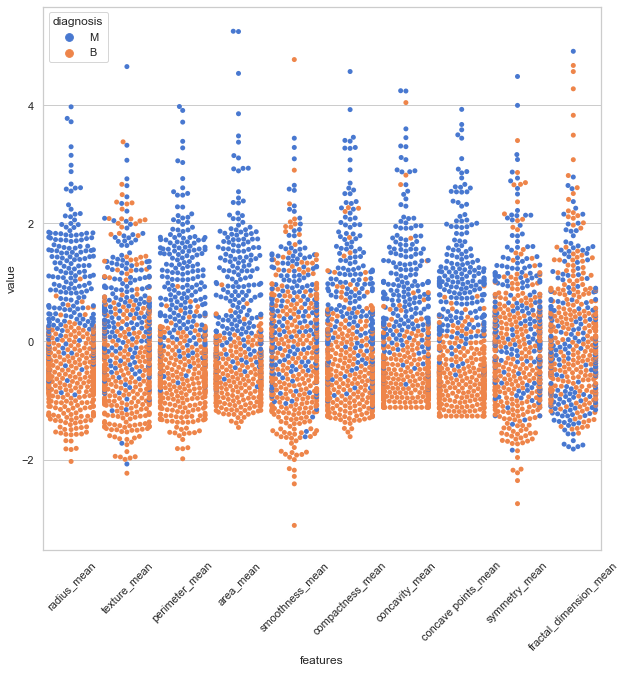

In [15]:
sns.set(style='whitegrid',palette='muted')

data = X
data_std = (data - data.mean())/data.std()
data = pd.concat([y,data_std.iloc[:,0:10]],axis=1)
data = pd.melt(data,id_vars='diagnosis',var_name='features',value_name='value')
plt.figure(figsize=(10,10))
sns.swarmplot(x='features',y='value',hue='diagnosis',data=data)
plt.xticks(rotation=45);

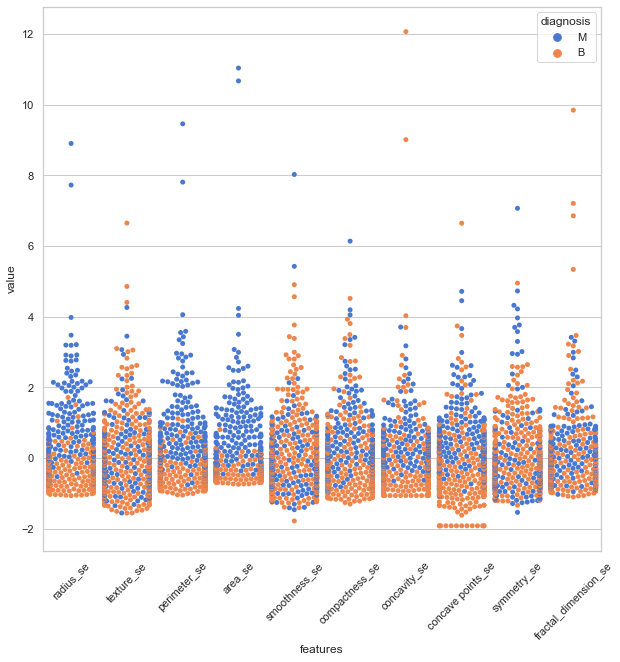

In [16]:
data = X
data_std = (data - data.mean())/data.std()
data = pd.concat([y,data_std.iloc[:,10:20]],axis=1)
data = pd.melt(data,id_vars='diagnosis',var_name='features',value_name='value')
plt.figure(figsize=(10,10))
sns.swarmplot(x='features',y='value',hue='diagnosis',data=data)
plt.xticks(rotation=45);

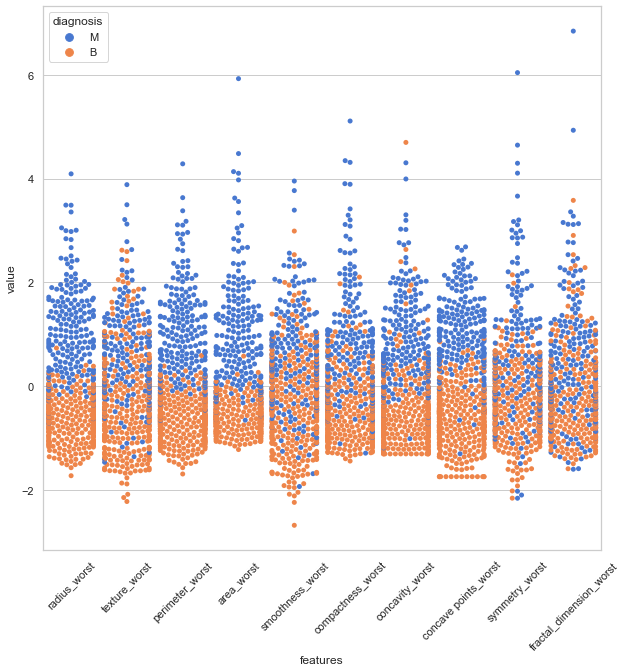

In [17]:
data = X
data_std = (data - data.mean())/data.std()
data = pd.concat([y,data_std.iloc[:,20:30]],axis=1)
data = pd.melt(data,id_vars='diagnosis',var_name='features',value_name='value')
plt.figure(figsize=(10,10))
sns.swarmplot(x='features',y='value',hue='diagnosis',data=data)
plt.xticks(rotation=45);

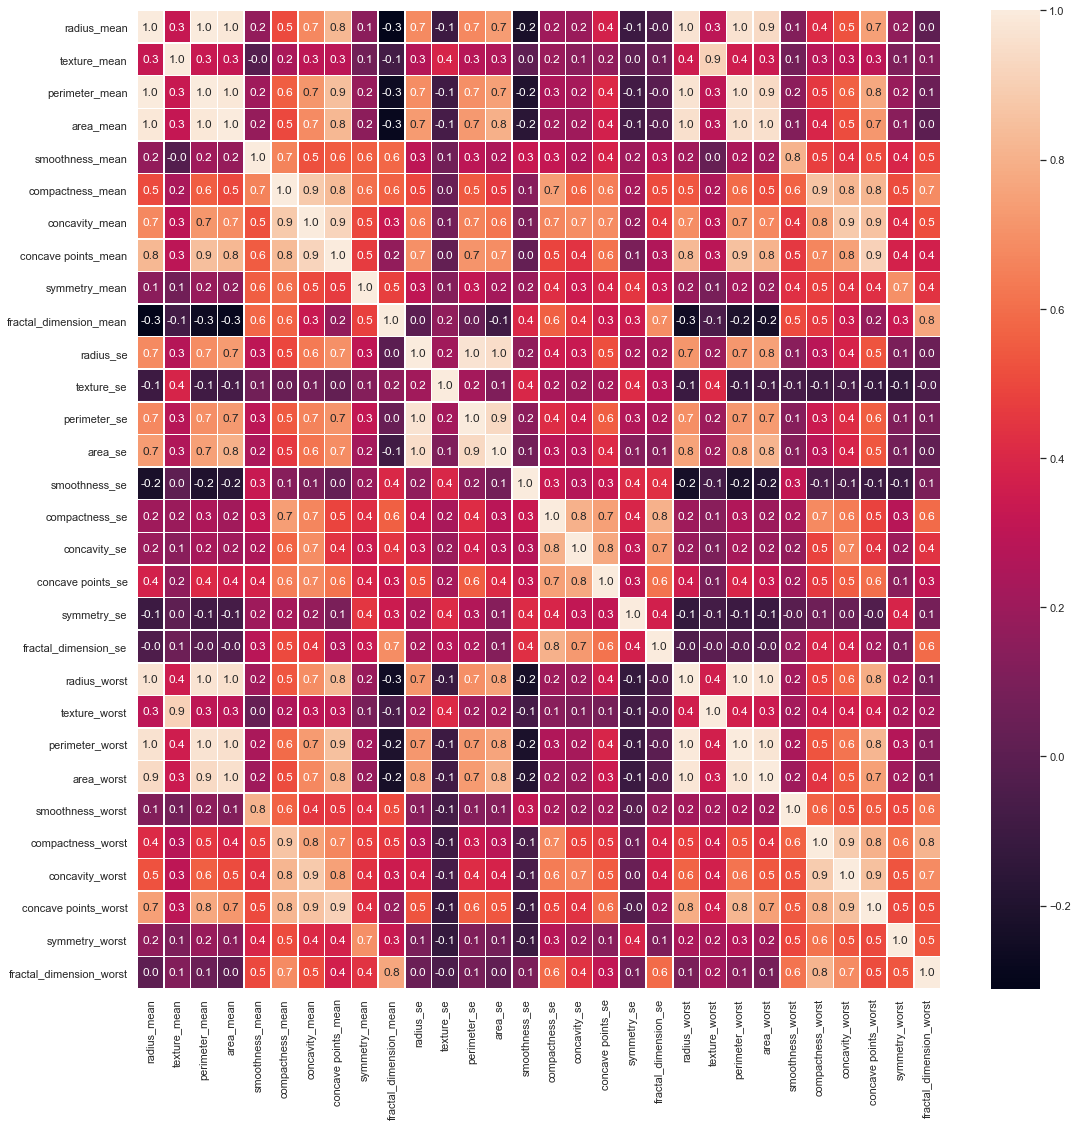

In [18]:
f, ax =plt.subplots(figsize=(18,18))
sns.heatmap(X.corr(),annot=True,linewidth=.5,fmt='.1f',ax=ax);

# Data Visalization with Seaborn (Part 2): Feature Selection and Classification

In [ ]:
Loading Libraries and Data

In [19]:
data

,diagnosis,features,value
0,M,radius_worst,1.885031
1,M,radius_worst,1.804340
2,M,radius_worst,1.510541
3,M,radius_worst,-0.281217
4,M,radius_worst,1.297434
...,...,...,...
5685,M,fractal_dimension_worst,-0.708467
5686,M,fractal_dimension_worst,-0.973122
5687,M,fractal_dimension_worst,-0.318129
5688,M,fractal_dimension_worst,2.217684


# Dropping Correlated Columns from Feature Matrix

In [26]:
drop_cols =['perimeter_mean','radius_mean','compactness_mean',
              'concave points_mean','radius_se','perimeter_se',
              'radius_worst','perimeter_worst','compactness_worst',
              'concave points_worst','compactness_se','concave points_se',
              'texture_worst','area_worst']

In [38]:
df = X.drop(drop_cols,axis=1)
y=data['diagnosis']

In [39]:
df

,texture_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,concavity_se,symmetry_se,fractal_dimension_se,smoothness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,10.38,1001.0,0.11840,0.30010,0.2419,0.07871,0.9053,153.40,0.006399,0.05373,0.03003,0.006193,0.16220,0.7119,0.4601,0.11890
1,17.77,1326.0,0.08474,0.08690,0.1812,0.05667,0.7339,74.08,0.005225,0.01860,0.01389,0.003532,0.12380,0.2416,0.2750,0.08902
2,21.25,1203.0,0.10960,0.19740,0.2069,0.05999,0.7869,94.03,0.006150,0.03832,0.02250,0.004571,0.14440,0.4504,0.3613,0.08758
3,20.38,386.1,0.14250,0.24140,0.2597,0.09744,1.1560,27.23,0.009110,0.05661,0.05963,0.009208,0.20980,0.6869,0.6638,0.17300
4,14.34,1297.0,0.10030,0.19800,0.1809,0.05883,0.7813,94.44,0.011490,0.05688,0.01756,0.005115,0.13740,0.4000,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,22.39,1479.0,0.11100,0.24390,0.1726,0.05623,1.2560,158.70,0.010300,0.05198,0.01114,0.004239,0.14100,0.4107,0.2060,0.07115
565,28.25,1261.0,0.09780,0.14400,0.1752,0.05533,2.4630,99.04,0.005769,0.03950,0.01898,0.002498,0.11660,0.3215,0.2572,0.06637
566,28.08,858.1,0.08455,0.09251,0.1590,0.05648,1.0750,48.55,0.005903,0.04730,0.01318,0.003892,0.11390,0.3403,0.2218,0.07820
567,29.33,1265.0,0.11780,0.35140,0.2397,0.07016,1.5950,86.22,0.006522,0.07117,0.02324,0.006185,0.16500,0.9387,0.4087,0.12400


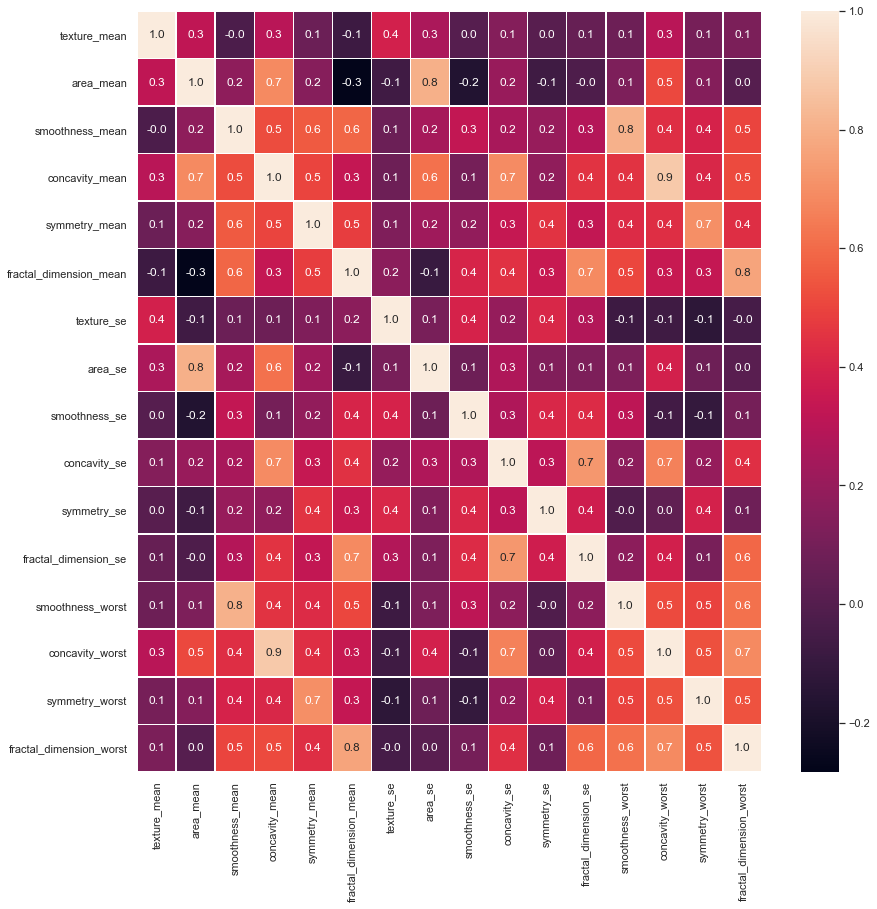

In [29]:
f, ax =plt.subplots(figsize=(14,14))
sns.heatmap(df.corr(),annot=True,linewidth=.5,fmt='.1f',ax=ax);

# Classification using XGBoost (minimal feature selection)

In [31]:
# !pip install xgboost

In [40]:
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score

In [41]:
x_train, x_test, y_train, y_test = train_test_split(df,y,test_size=0.3,random_state=42)
clf_1 = xgb.XGBClassifier(random_state=42)
clf_1 = clf_1.fit(x_train,y_train)

Accuracy is:  0.9766081871345029


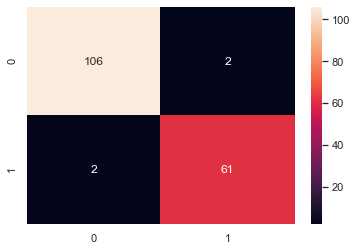

In [48]:
print('Accuracy is: ',accuracy_score(y_test,clf_1.predict(x_test)))
cm = confusion_matrix(y_test,clf_1.predict(x_test))
sns.heatmap(cm,annot=True,fmt='d');

# Univariate Feature Selection and XGBoost

In [49]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [53]:
select_feature = SelectKBest(chi2,10).fit(x_train,y_train)
print('Score list: ', select_feature.scores_)
print('Feature list: ',x_train.columns)

Score list:  [6.06916433e+01 3.66899557e+04 1.00015175e-01 1.30547650e+01
 1.95982847e-01 3.42575072e-04 4.07131026e-02 6.12741067e+03
 1.32470372e-03 6.92896719e-01 1.39557806e-03 2.65927071e-03
 2.63226314e-01 2.58858117e+01 1.00635138e+00 1.23087347e-01]
Feature list:  Index(['texture_mean', 'area_mean', 'smoothness_mean', 'concavity_mean',
       'symmetry_mean', 'fractal_dimension_mean', 'texture_se', 'area_se',
       'smoothness_se', 'concavity_se', 'symmetry_se', 'fractal_dimension_se',
       'smoothness_worst', 'concavity_worst', 'symmetry_worst',
       'fractal_dimension_worst'],
      dtype='object')


Accuracy is:  0.9824561403508771


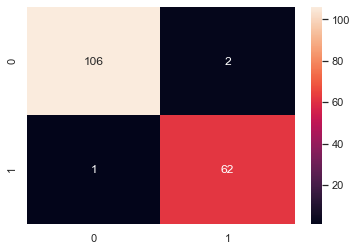

In [57]:
x_train_2 = select_feature.transform(x_train)
x_test_2 = select_feature.transform(x_test)

clf_2 = clf_1.fit(x_train_2,y_train) 

print('Accuracy is: ',accuracy_score(y_test,clf_2.predict(x_test_2)))
cm_2 = confusion_matrix(y_test,clf_2.predict(x_test_2))
sns.heatmap(cm_2,annot=True,fmt='d');

# Recursive Feature Elimination with Cross-Validation

In [58]:
from sklearn.feature_selection import RFECV

In [61]:
clf_3 = xgb.XGBClassifier()
rfecv = RFECV(estimator=clf_3,step=1,cv=5,scoring='accuracy',n_jobs=-1).fit(x_train,y_train)

print('Optimal number of features: ',rfecv.n_features_)
print('Best features: ',x_train.columns[rfecv.support_])

Optimal number of features:  14
Best features:  Index(['texture_mean', 'area_mean', 'smoothness_mean', 'concavity_mean',
       'symmetry_mean', 'texture_se', 'area_se', 'smoothness_se',
       'concavity_se', 'symmetry_se', 'fractal_dimension_se',
       'smoothness_worst', 'concavity_worst', 'symmetry_worst'],
      dtype='object')


Accuracy is:  0.9824561403508771


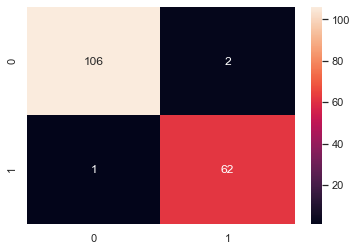

In [62]:
print('Accuracy is: ',accuracy_score(y_test,rfecv.predict(x_test)))
cm_3 = confusion_matrix(y_test,rfecv.predict(x_test))
sns.heatmap(cm_3,annot=True,fmt='d');

[Text(0, 0.5, 'cv scores'), Text(0.5, 0, 'No of selected features')]

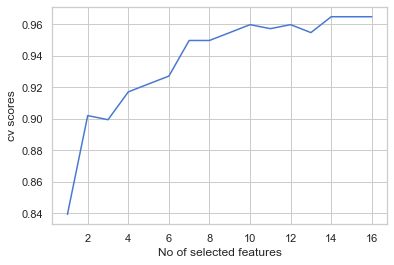

In [63]:
num_features = [i for i in range(1,len(rfecv.grid_scores_)+1)]
cv_scores = rfecv.grid_scores_
ax = sns.lineplot(x=num_features,y=cv_scores)
ax.set(xlabel='No of selected features',ylabel='cv scores')

# Feature Extraction using Principal Component Analysis

In [64]:
x_train, x_test, y_train, y_test = train_test_split(df,y,test_size=0.3,random_state=42)
x_train_norm = (x_train-x_train.mean())/(x_train.max()-x_train.min())
x_test_norm = (x_test-x_test.mean())/(x_test.max()-x_test.min())

Text(0, 0.5, 'Cumulative explaines variance')

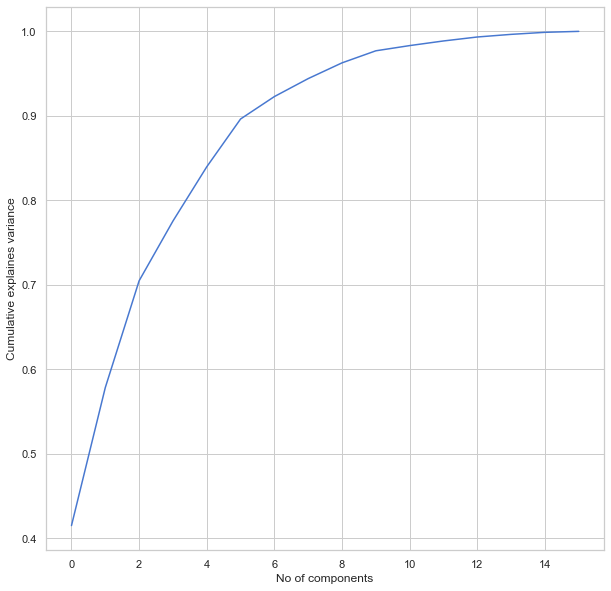

In [66]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(x_train_norm)

plt.figure(1,figsize=(10,10))
sns.lineplot(data=np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('No of components')
plt.ylabel('Cumulative explaines variance')